In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_track_examples', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-12-29 11:12:44	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_track_examples/datapackage.json
2016-12-29 11:12:44	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-12-29 11:13:11 	Initializing Study
2016-12-29 11:13:11 	Initializing Predictor configuration manager for Study
2016-12-29 11:13:11	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-29 11:13:11	Added ExtraTreesClassifier to default predictors
2016-12-29 11:13:11	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-29 11:13:11	Added ExtraTreesRegressor to default predictors
2016-12-29 11:13:11	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-29 11:13:11	Added Gradie

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
folder = 'figures'

In [3]:
figure_folder = 'figures/013_look_at_good_correlations'
! mkdir -p $figure_folder

In [4]:
splicing_expression_corr_tidy = study.supplemental.splicing_expression_corr
splicing_expression_corr_tidy = splicing_expression_corr_tidy.loc[splicing_expression_corr_tidy['Pearson R'].abs() > 0.5]
splicing_expression_corr_tidy = splicing_expression_corr_tidy.join(study.expression.feature_data['gene_name'], on='Expression Gene')
splicing_expression_corr_tidy['Correlation Direction'] = splicing_expression_corr_tidy['Pearson R'].map(
    lambda x: '(+) Positive' if x > 0 else '(-) Negative')
print(splicing_expression_corr_tidy.shape)
splicing_expression_corr_tidy.head()

(3011, 8)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative


In [5]:
study.expression.feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,NaN,False,False,False,2.0,False,False,False,8
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,NaN,False,False,False,11.0,False,False,False,7
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,NaN,False,False,False,1.0,False,False,False,10
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,NaN,False,False,False,2.0,False,False,False,14
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,NaN,False,False,True,6.0,False,False,False,29


In [6]:
splicing_expression_corr_tidy_gene_types = splicing_expression_corr_tidy.join(study.expression.feature_data['gene_type'], on='Expression Gene')
print(splicing_expression_corr_tidy_gene_types.shape)
splicing_expression_corr_tidy_gene_types.head()

(3011, 9)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction,gene_type
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative,protein_coding
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative,protein_coding
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative,protein_coding
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative,protein_coding
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative,protein_coding


In [7]:
splicing_expression_corr_tidy_protein_coding = splicing_expression_corr_tidy_gene_types.query('gene_type == "protein_coding"')
print(splicing_expression_corr_tidy_protein_coding.shape)
splicing_expression_corr_tidy_protein_coding.head()

(2496, 9)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction,gene_type
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative,protein_coding
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative,protein_coding
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative,protein_coding
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative,protein_coding
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative,protein_coding


In [8]:
for (splicing_gene, phenotype), df in splicing_expression_corr_tidy_protein_coding.groupby(['Splicing Gene', 'phenotype']):
    print(splicing_gene, df.shape)
    df.to_csv('{}/{}_{}_correlations.csv'.format(figure_folder, splicing_gene, phenotype))

BRD8-event1 (87, 9)
BRD8-event1 (168, 9)
BRD8-event2 (529, 9)
DYNC1I2 (157, 9)
DYNC1I2 (462, 9)
EIF5 (159, 9)
EIF5 (1, 9)
EIF6 (24, 9)
MDM4 (32, 9)
MEAF6 (56, 9)
PKM (189, 9)
RPN2 (11, 9)
SMARCE1 (240, 9)
SNAP25 (50, 9)
SUGT1 (306, 9)
SUGT1 (25, 9)


In [9]:
splicing_events = (('BRD8-event1', 'exon:chr5:137495758-137495862:- exon:chr5:137495244-137495288:- exon:chr5:137492571-137492956:-'),
                   ('BRD8-event2', 'exon:chr5:137500009-137500102:- exon:chr5:137499776-137499822:- exon:chr5:137498819-137499033:-'),
                   ("DYNC1I2", 'exon:chr2:172563743-172563887:+ exon:chr2:172569277-172569336:+ exon:chr2:172571838-172571878:+'),
                   ('EIF5', 'exon:chr14:103800339-103800597:+ exon:chr14:103800726-103800934:+ exon:chr14:103801990-103802269:+'),
                   ('EIF6', 'exon:chr20:33871979-33872295:- exon:chr20:33868457-33868632:- exon:chr20:33867745-33867921:-'),
                   ("MDM4", 'exon:chr1:204501319-204501374:+ exon:chr1:204506558-204506625:+ exon:chr1:204507337-204507436:+'),
                   ("MEAF6", 'exon:chr1:37967405-37967597:- exon:chr1:37962308-37962337:- exon:chr1:37961475-37961519:-'),
                   ("RPN2", 'exon:chr20:35864983-35865112:+ exon:chr20:35866805-35866852:+ exon:chr20:35869706-35869820:+'),
                   ('SUGT1', 'exon:chr13:53233314-53233384:+ exon:chr13:53235610-53235705:+ exon:chr13:53236784-53236837:+'),
                   ('PKM', 'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'),
                   ('SNAP25', 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'),
                   ('SMARCE1', 'exon:chr17:38801828-38801871:- exon:chr17:38798707-38798811:- exon:chr17:38793744-38793824:-'))

splicing_events = list(((x, '@'.join(y.split())) for x, y in splicing_events))
splicing_events

[('BRD8-event1',
  'exon:chr5:137495758-137495862:-@exon:chr5:137495244-137495288:-@exon:chr5:137492571-137492956:-'),
 ('BRD8-event2',
  'exon:chr5:137500009-137500102:-@exon:chr5:137499776-137499822:-@exon:chr5:137498819-137499033:-'),
 ('DYNC1I2',
  'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'),
 ('EIF5',
  'exon:chr14:103800339-103800597:+@exon:chr14:103800726-103800934:+@exon:chr14:103801990-103802269:+'),
 ('EIF6',
  'exon:chr20:33871979-33872295:-@exon:chr20:33868457-33868632:-@exon:chr20:33867745-33867921:-'),
 ('MDM4',
  'exon:chr1:204501319-204501374:+@exon:chr1:204506558-204506625:+@exon:chr1:204507337-204507436:+'),
 ('MEAF6',
  'exon:chr1:37967405-37967597:-@exon:chr1:37962308-37962337:-@exon:chr1:37961475-37961519:-'),
 ('RPN2',
  'exon:chr20:35864983-35865112:+@exon:chr20:35866805-35866852:+@exon:chr20:35869706-35869820:+'),
 ('SUGT1',
  'exon:chr13:53233314-53233384:+@exon:chr13:53235610-53235705:+@exon:chr13:53236784

In [10]:
single_splicing = study.splicing.singles

In [11]:
single_metadata = study.metadata.data.query('(single == True)')
print(single_metadata.shape)
single_metadata.head()

(206, 10)


,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
CVN_01,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_02,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_03,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_04,True,False,NPC,False,True,False,True,NaN,NaN,False
CVN_05,True,False,NPC,False,True,False,True,NaN,NaN,False


In [12]:
outlier_colors = pd.Series(['lightgrey' if x else 'black' for x in single_metadata['outlier']], 
                           index=single_metadata.index)
outlier_colors[:5]

CVN_01    black
CVN_02    black
CVN_03    black
CVN_04    black
CVN_05    black
dtype: object

In [13]:
single_expression = study.expression.singles
print(single_expression.shape)
single_expression.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0.0,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0.0,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0.0,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0.0,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0.0,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [14]:
gene_filter = (single_expression > 1).sum() >= 30
gene_filter.sum()

14314

In [15]:
single_expression = single_expression.loc[:, gene_filter]
print(single_expression.shape)
single_expression.head()

(206, 14314)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000178605,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,7.703080,...,3.29961,1.774580,0.080647,0.291587,1.017003,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,6.666089,...,0.00000,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,0.000000,...,0.00000,0.225987,0.000000,0.000000,0.330164,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,5.373481,...,0.00000,1.646223,0.562974,0.000000,0.223287,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,8.701198,...,0.00000,0.900241,0.353069,0.000000,0.646603,6.631383,0.000000,0.096939,0.133075,0.553417


In [16]:
splicing_to_correlate = pd.DataFrame(dict((gene, study.splicing.singles[event_id].dropna()) 
                                          for gene, event_id in splicing_events))
print(splicing_to_correlate.shape)
splicing_to_correlate.head()

(196, 12)


,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,PKM,RPN2,SMARCE1,SNAP25,SUGT1
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.000000,0.350598,1.0,NaN,0.250000
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.000000,0.213058,NaN,NaN,0.000000
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.348754,0.000000,1.0,NaN,0.292383


In [17]:
# fig, ax = plt.subplots(figsize=(3, 2))
# sns.violinplot(x='Splicing Gene', y='Pearson R', data=correlations_tidy, hue='dataset', 
#                palette=['DarkTurquoise', 'lightGrey'], order=splicing_events.keys(),
#                hue_order=['Actual', 'Permuted'], cut=True)
# sns.despine()
# fig.savefig('{}/pearson_correlation_violinplots.pdf'.format(folder))

In [18]:
# g = sns.FacetGrid(correlations_tidy, col='Splicing Gene', hue='dataset',
#                   palette=['DarkTurquoise', 'lightGrey'], hue_order=['Actual', 'Permuted'])
# g.map(sns.distplot, 'Pearson R')

In [19]:
import matplotlib as mpl

cmap = mpl.cm.RdYlBu_r

In [20]:
! mkdir $folder

mkdir: cannot create directory `figures': File exists


In [21]:
figure_folder = '{}/013_look_at_good_correlations'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `figures/013_look_at_good_correlations': File exists


In [22]:
sns.set(context='paper', style='white')

BRD8-event1 NPC (87, 30)
BRD8-event1 iPSC (168, 24)
BRD8-event2 iPSC (529, 26)
DYNC1I2 NPC (157, 34)
DYNC1I2 iPSC (462, 38)
EIF5 MN (159, 47)
EIF5 NPC (1, 47)
EIF6 MN (24, 37)
MDM4 NPC (32, 30)
MEAF6 NPC (56, 40)
PKM MN (189, 41)
RPN2 MN (11, 47)
SMARCE1 MN (240, 38)
SNAP25 MN (50, 32)
SUGT1 MN (306, 24)
SUGT1 NPC (25, 34)


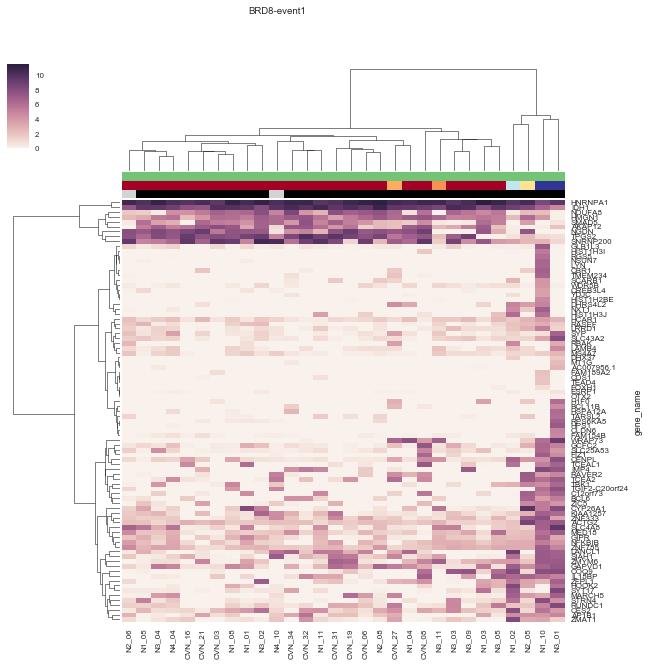

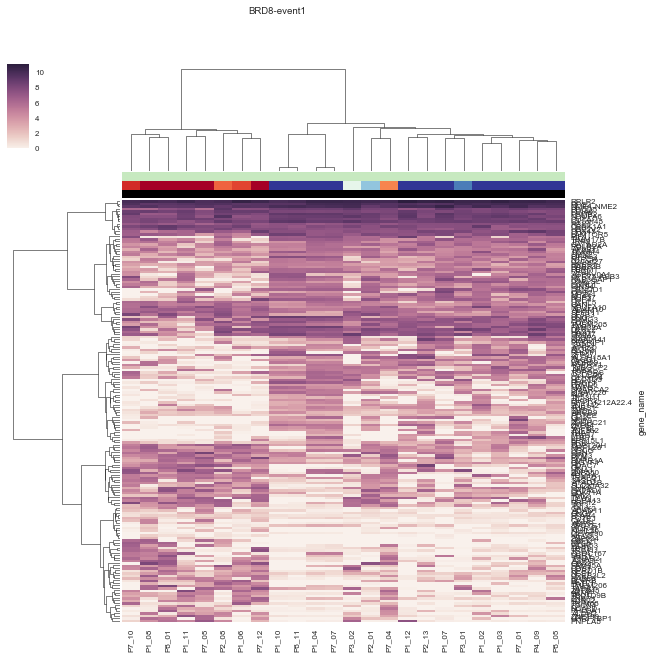

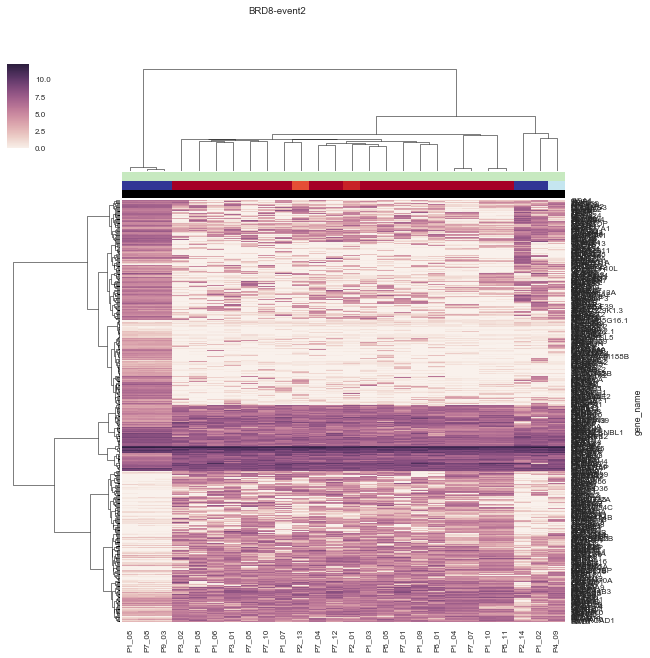

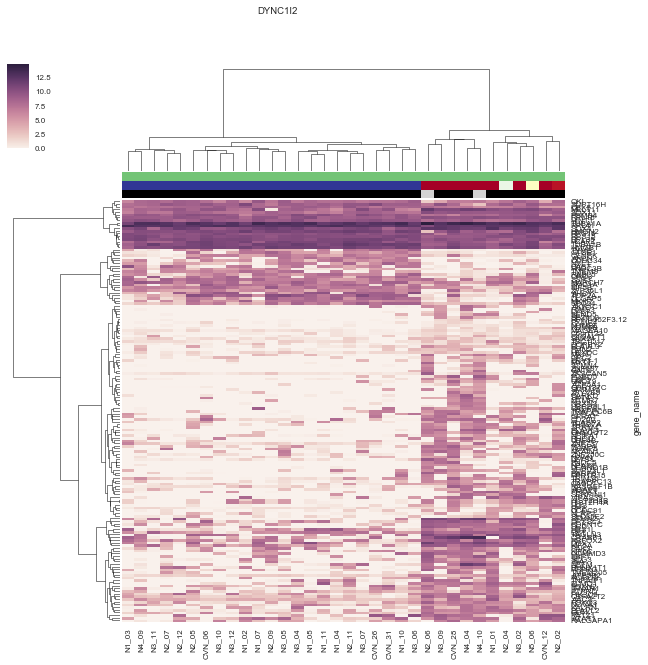

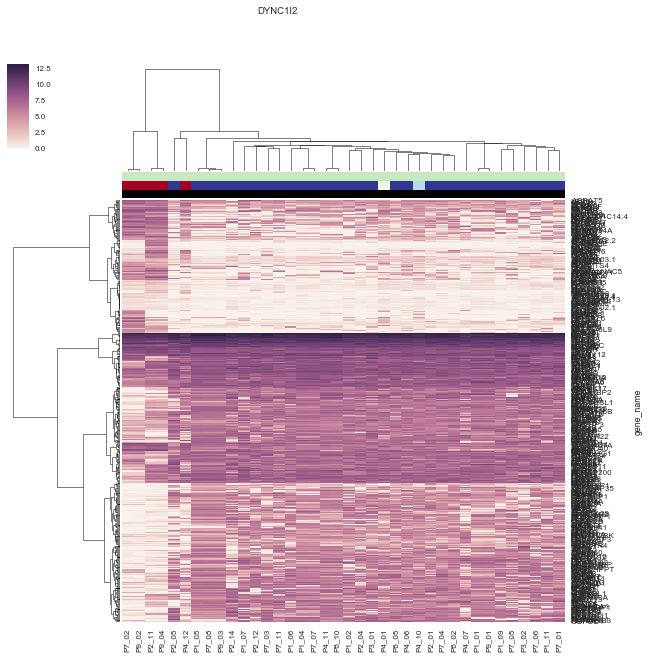

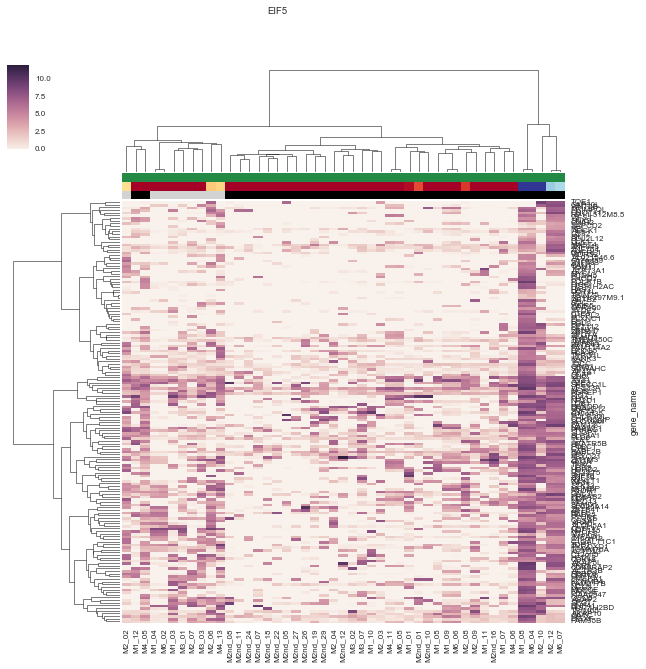

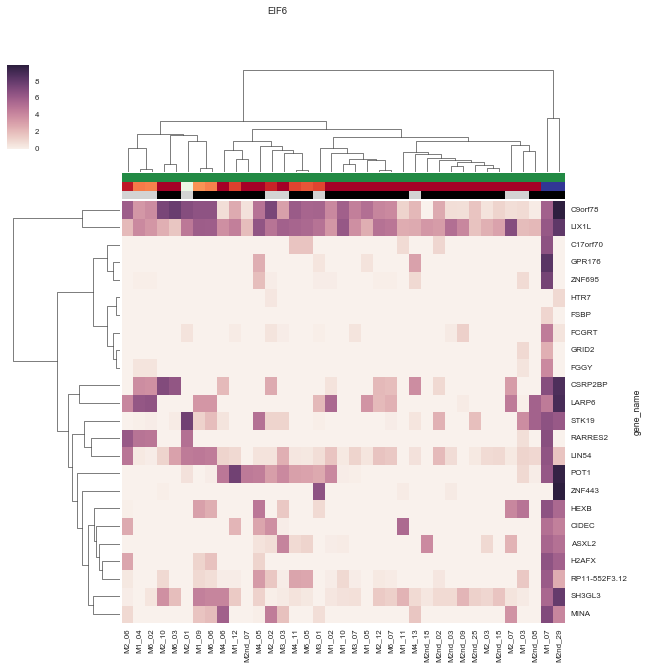

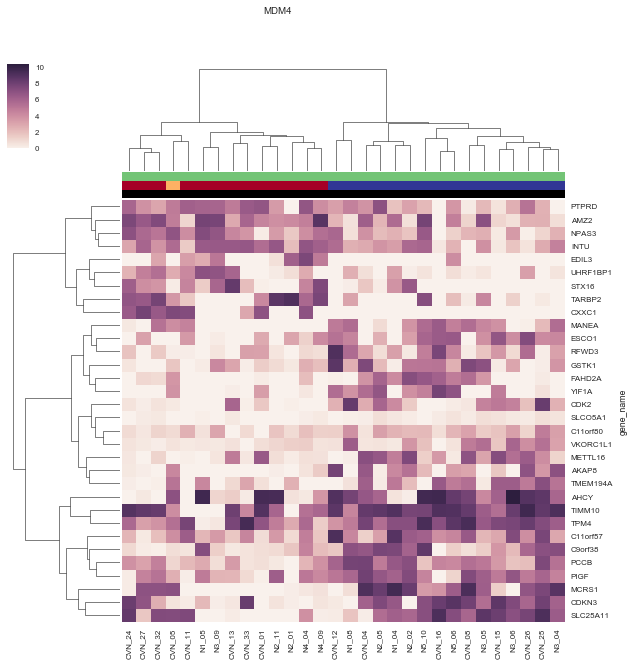

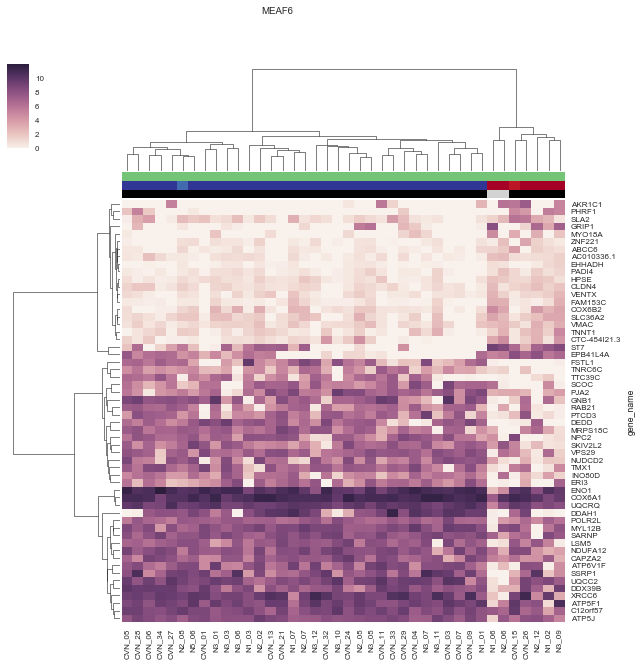

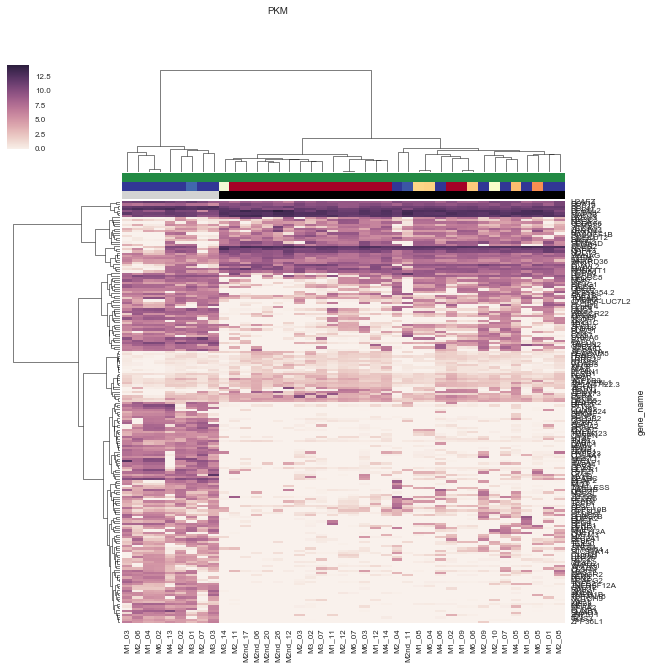

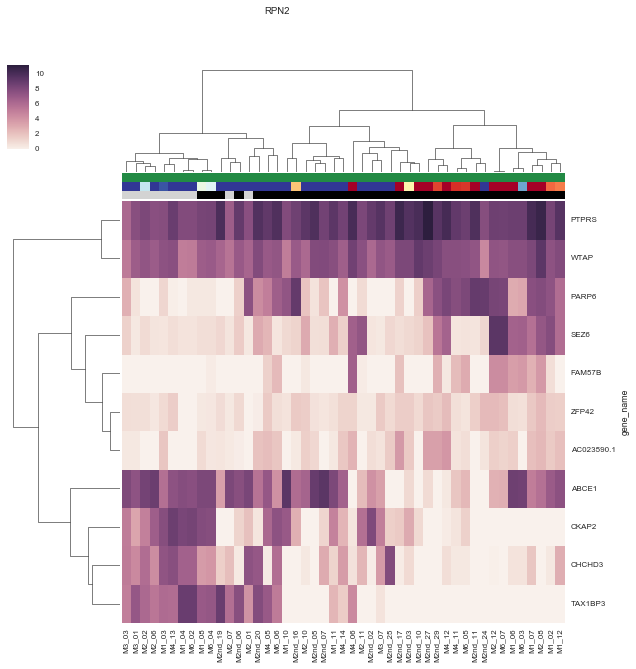

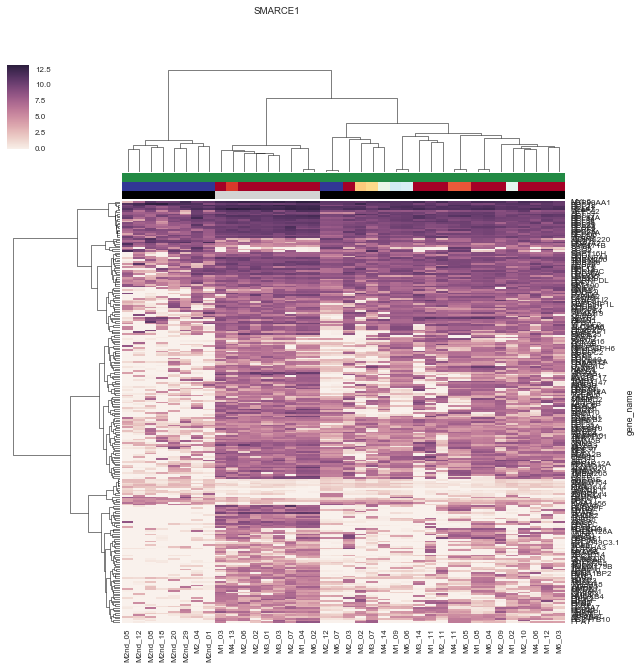

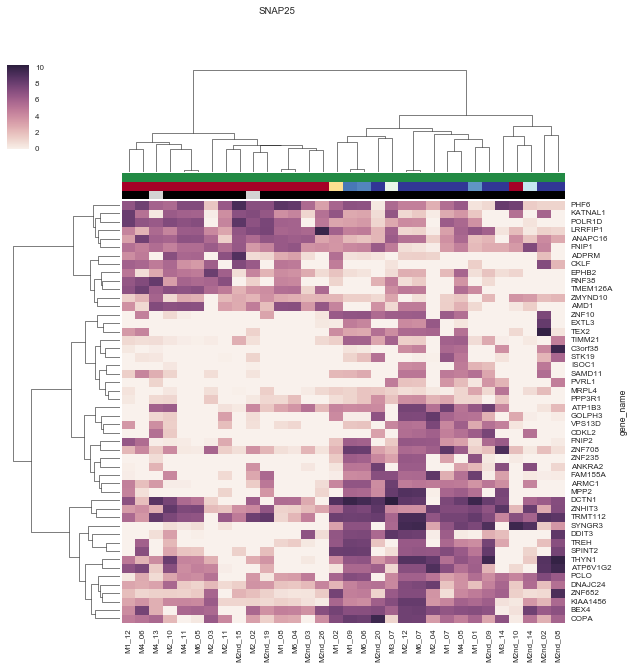

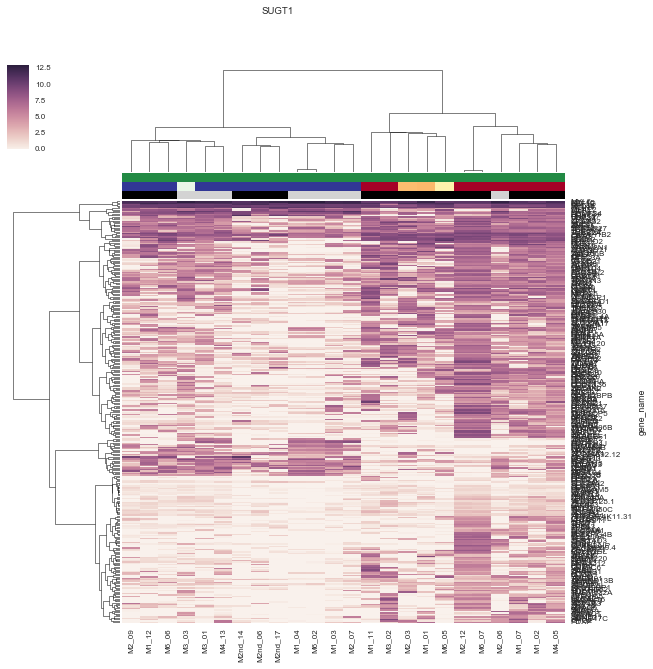

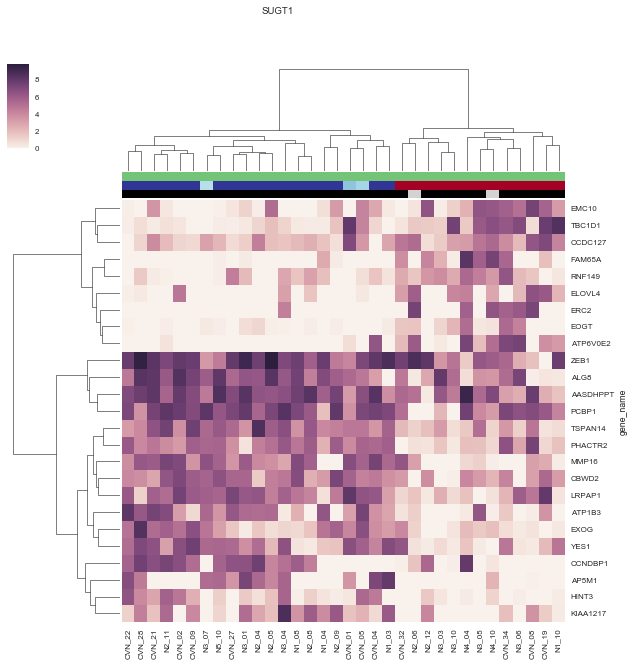

In [23]:
for (splicing_gene, phenotype), df in splicing_expression_corr_tidy_protein_coding.groupby(['Splicing Gene', 'phenotype']):
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    samples = single_metadata.query('phenotype == @phenotype').index
    samples = splicing.index.intersection(samples)
    splicing = splicing[samples]
    
    genes = df['Expression Gene']
    gene_names = df['gene_name']
    
    subset = single_expression.loc[samples, genes]
    subset.columns = gene_names
    subset = subset.T
    print(splicing_gene, phenotype, subset.shape)
    if subset.shape[0] < 2:
        continue

    psi_color = [cmap(float(splicing[sample_id])) for sample_id in subset.columns]
    phenotype_color = [study.phenotype_to_color[study.sample_id_to_phenotype[sample_id]]
                       for sample_id in subset.columns]
    side_colors = [phenotype_color, psi_color, outlier_colors[subset.columns]]
    
    g = sns.clustermap(subset, col_colors=side_colors, method='ward')
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    g.fig.suptitle(splicing_gene)
    g.savefig('{folder}/{splicing_gene}_{phenotype}_correlated_genes_clustermap.pdf'.format(
            folder=figure_folder, splicing_gene=splicing_gene, phenotype=phenotype))
    
    subset.iloc[g.dendrogram_row.reordered_ind, :0].to_csv(
        '{folder}/{splicing_gene}_{phenotype}_correlated_genes_clustered_order.csv'.format(
            folder=figure_folder, splicing_gene=splicing_gene, phenotype=phenotype))

In [25]:
figure_folder

'figures/013_look_at_good_correlations'

In [28]:
rows = (splicing_expression_corr_tidy_protein_coding['Splicing Gene'] == 'EIF5') & (splicing_expression_corr_tidy_protein_coding['phenotype'] == 'NPC')
splicing_expression_corr_tidy_protein_coding.loc[rows]

,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction,gene_type
96558,EIF5,NPC,ENSG00000204370,0.517758,exon:chr14:103800339-103800597:+@exon:chr14:10...,bimodal,SDHD,(+) Positive,protein_coding


## PCA of correlated genes

In [29]:
folder

'figures'

In [52]:
figure_folder

'figures/013_look_at_good_correlations'

BRD8-event1 	 NPC 	samples: 30 	genes: 87
BRD8-event1 	 iPSC 	samples: 24 	genes: 168
BRD8-event2 	 iPSC 	samples: 26 	genes: 529
DYNC1I2 	 NPC 	samples: 34 	genes: 157
DYNC1I2 	 iPSC 	samples: 38 	genes: 462
EIF5 	 MN 	samples: 47 	genes: 159
EIF5 	 NPC 	samples: 47 	genes: 1
EIF6 	 MN 	samples: 37 	genes: 24
MDM4 	 NPC 	samples: 30 	genes: 32
MEAF6 	 NPC 	samples: 40 	genes: 56
PKM 	 MN 	samples: 41 	genes: 189
RPN2 	 MN 	samples: 47 	genes: 11
SMARCE1 	 MN 	samples: 38 	genes: 240
SNAP25 	 MN 	samples: 32 	genes: 50
SUGT1 	 MN 	samples: 24 	genes: 306
SUGT1 	 NPC 	samples: 34 	genes: 25


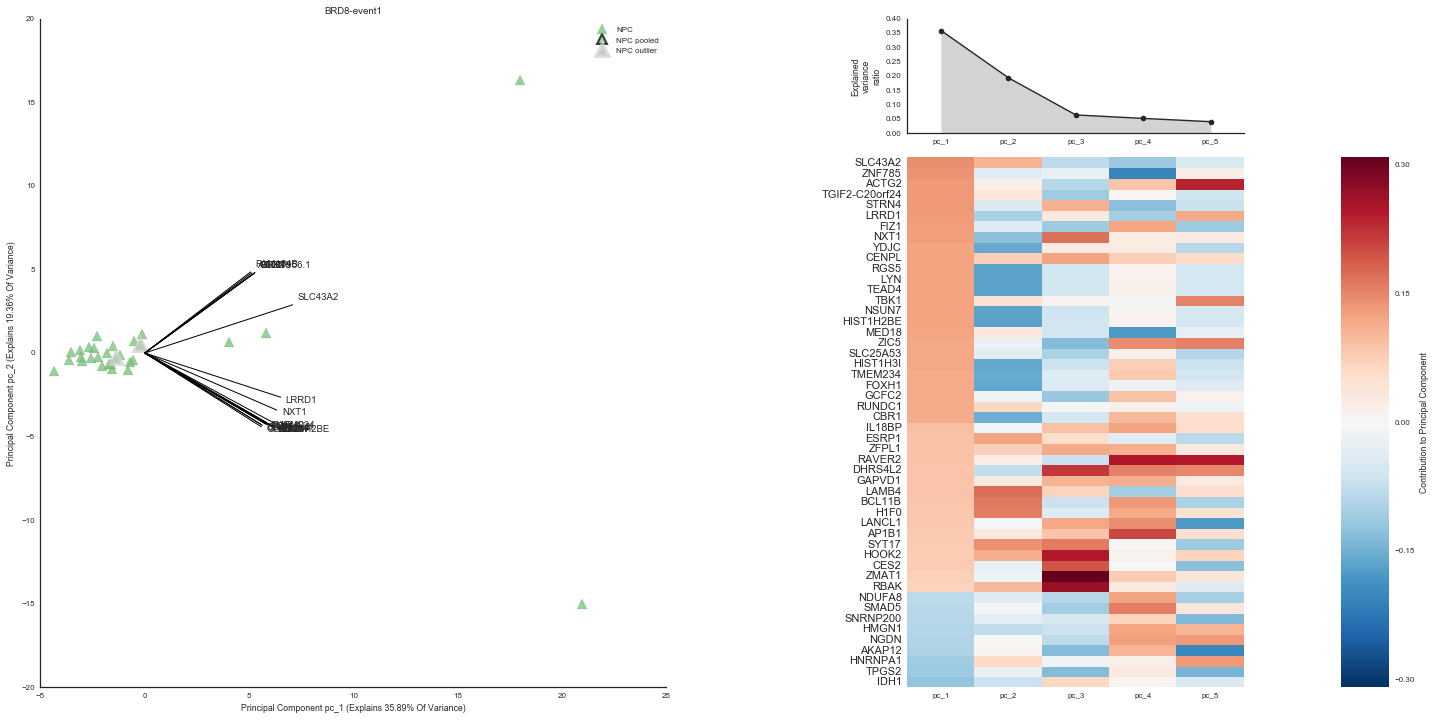

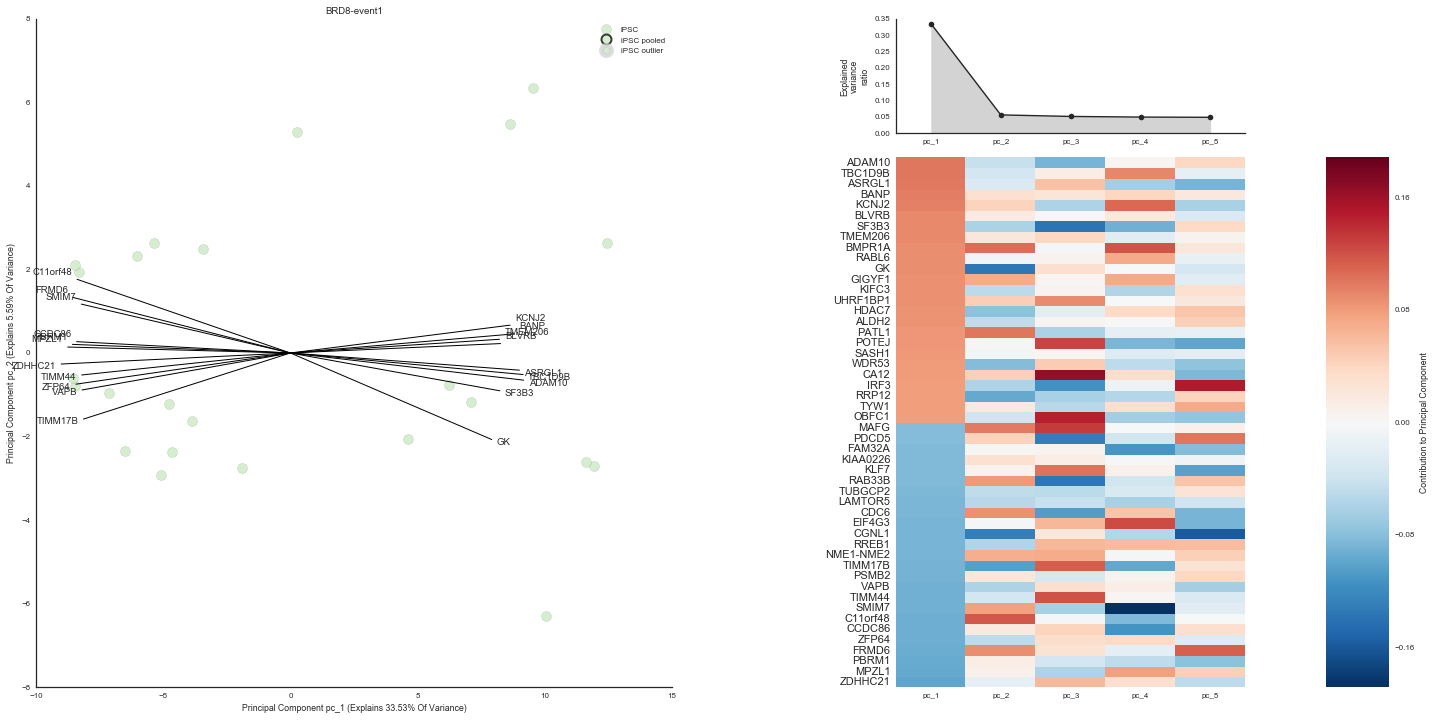

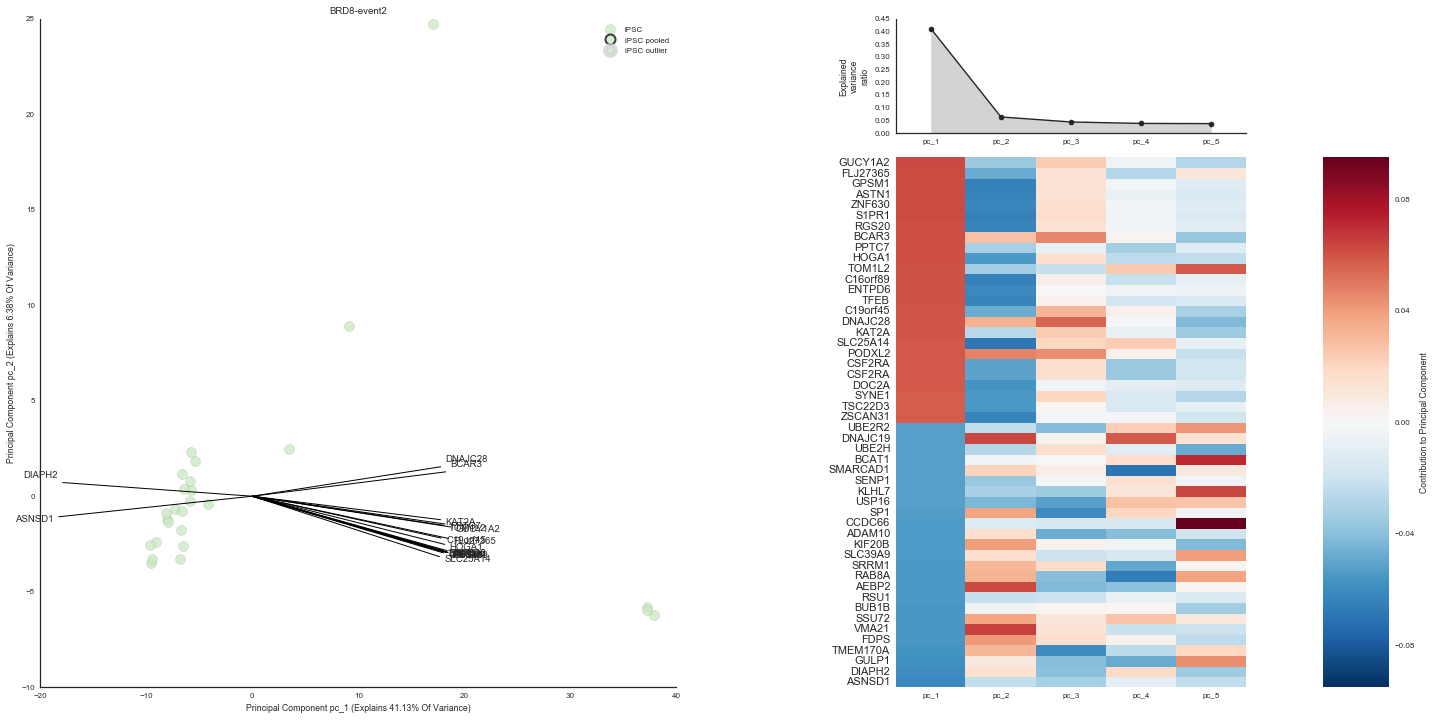

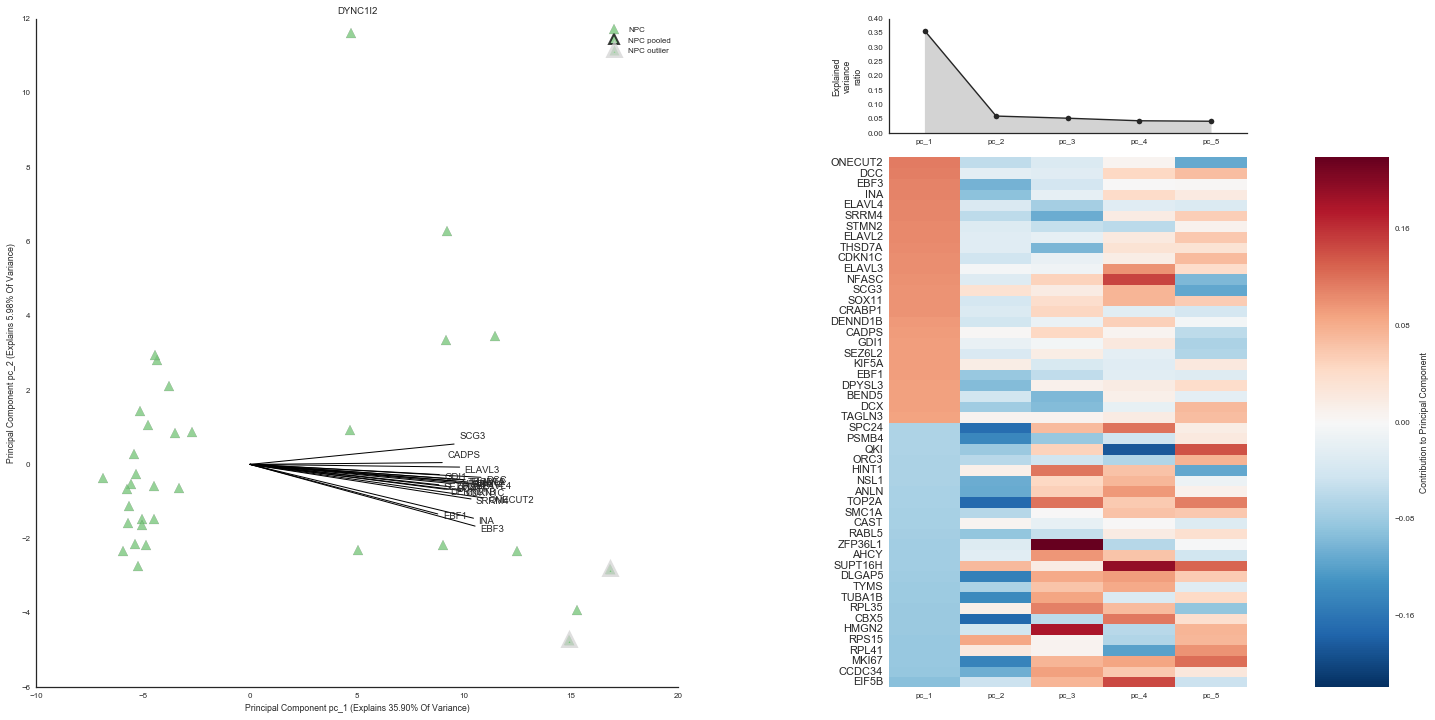

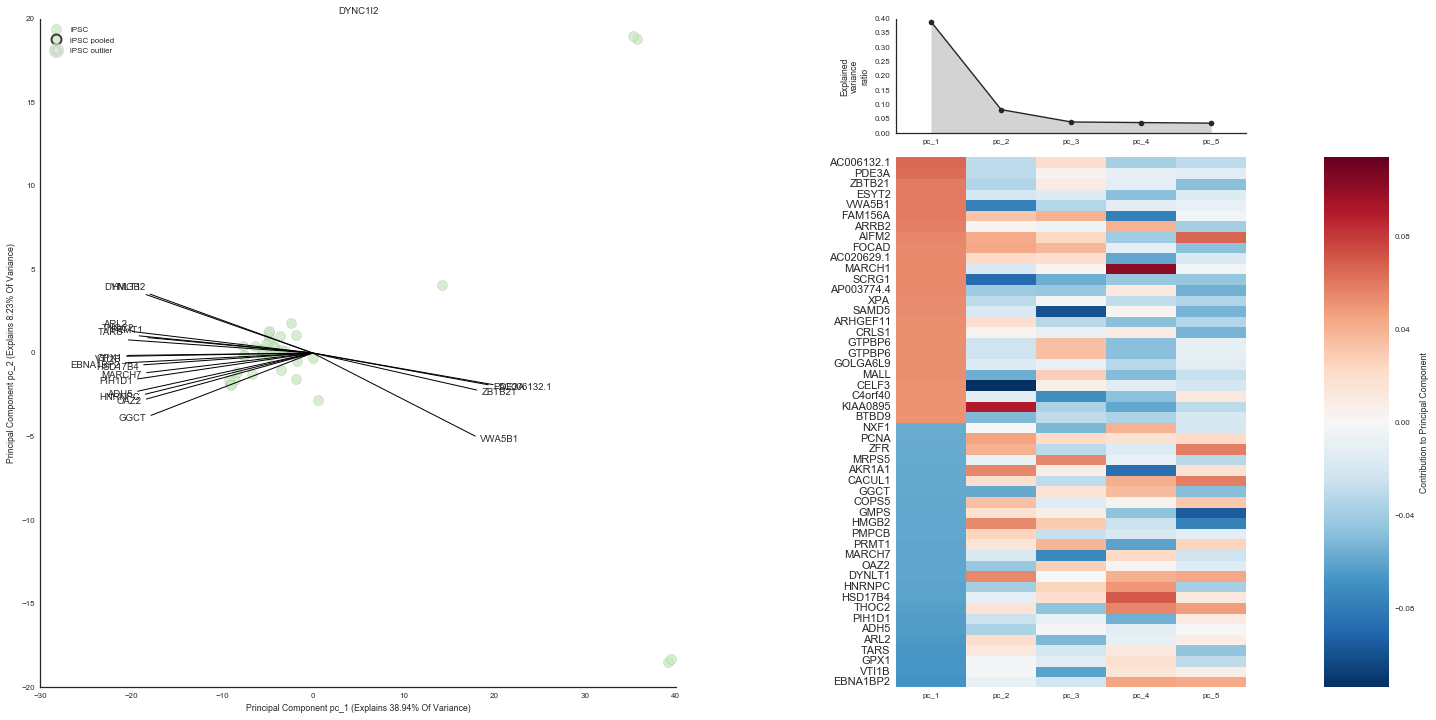

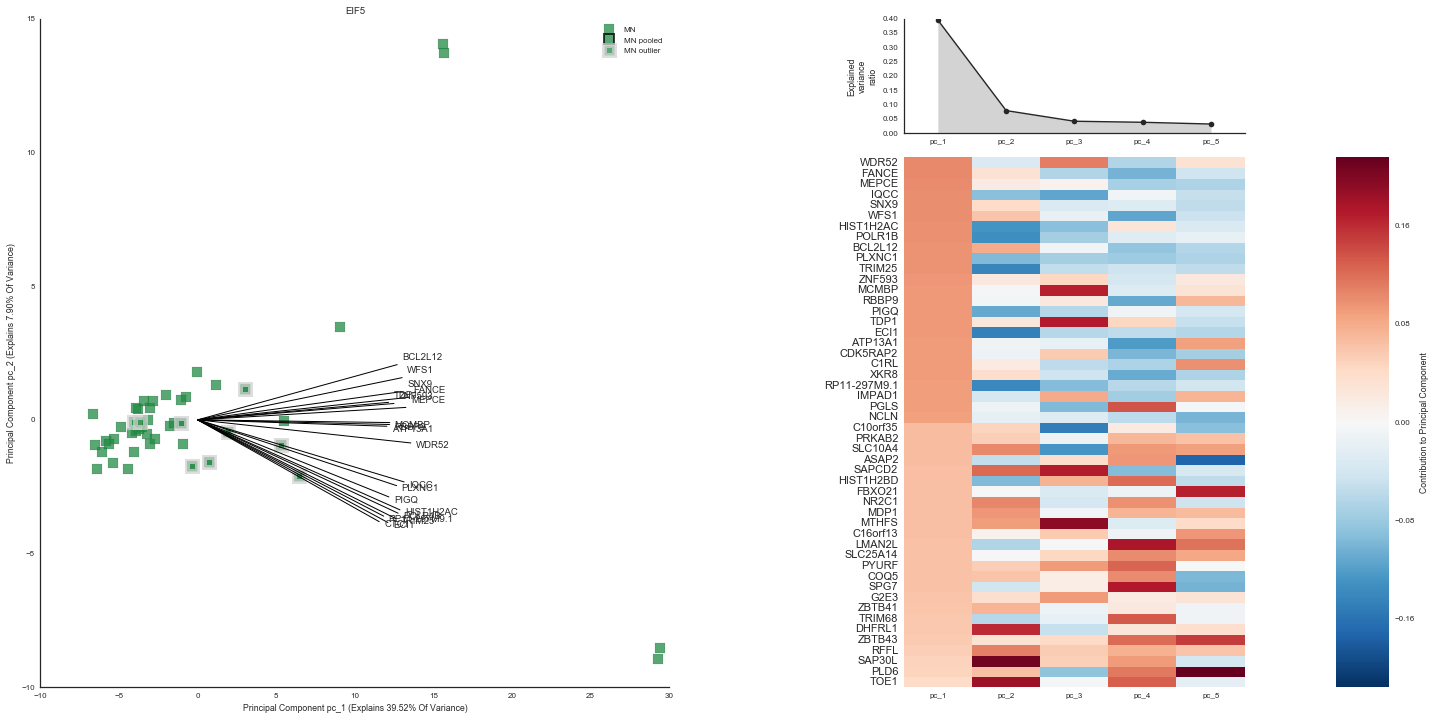

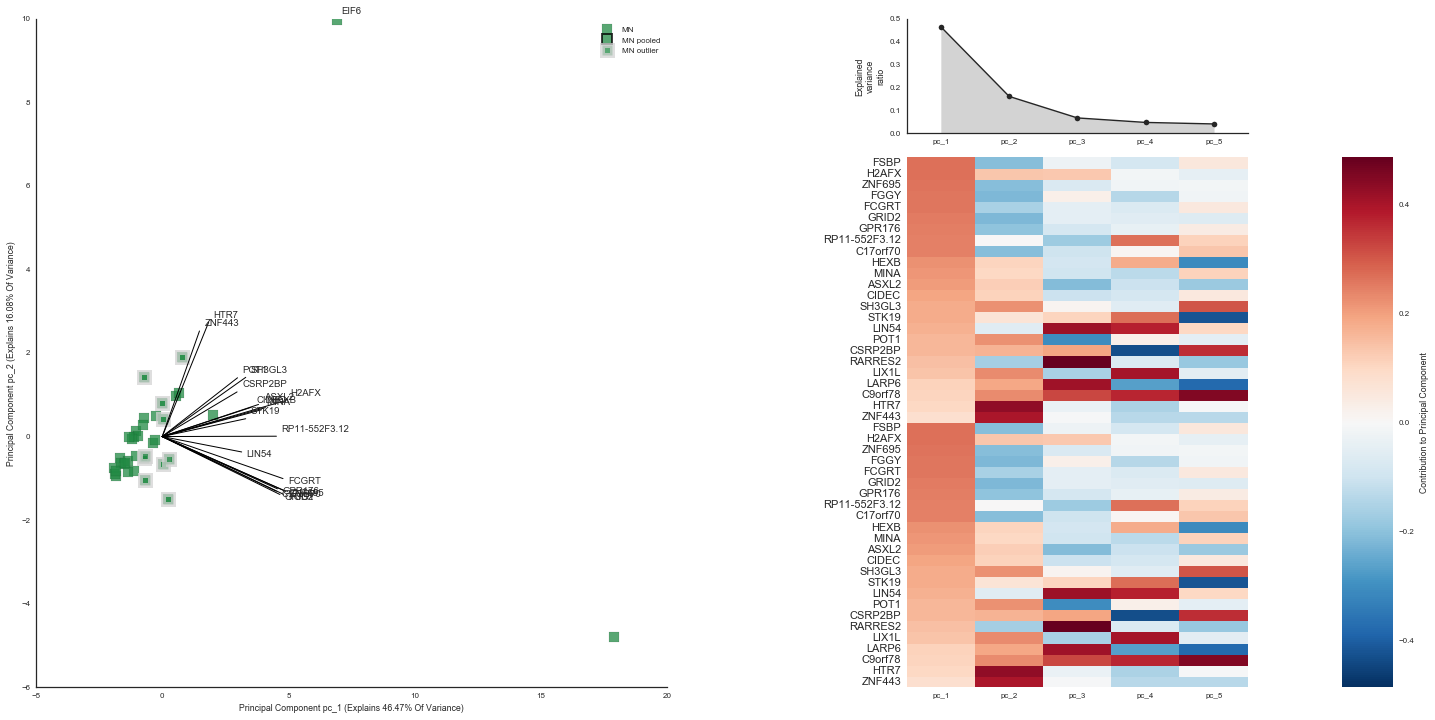

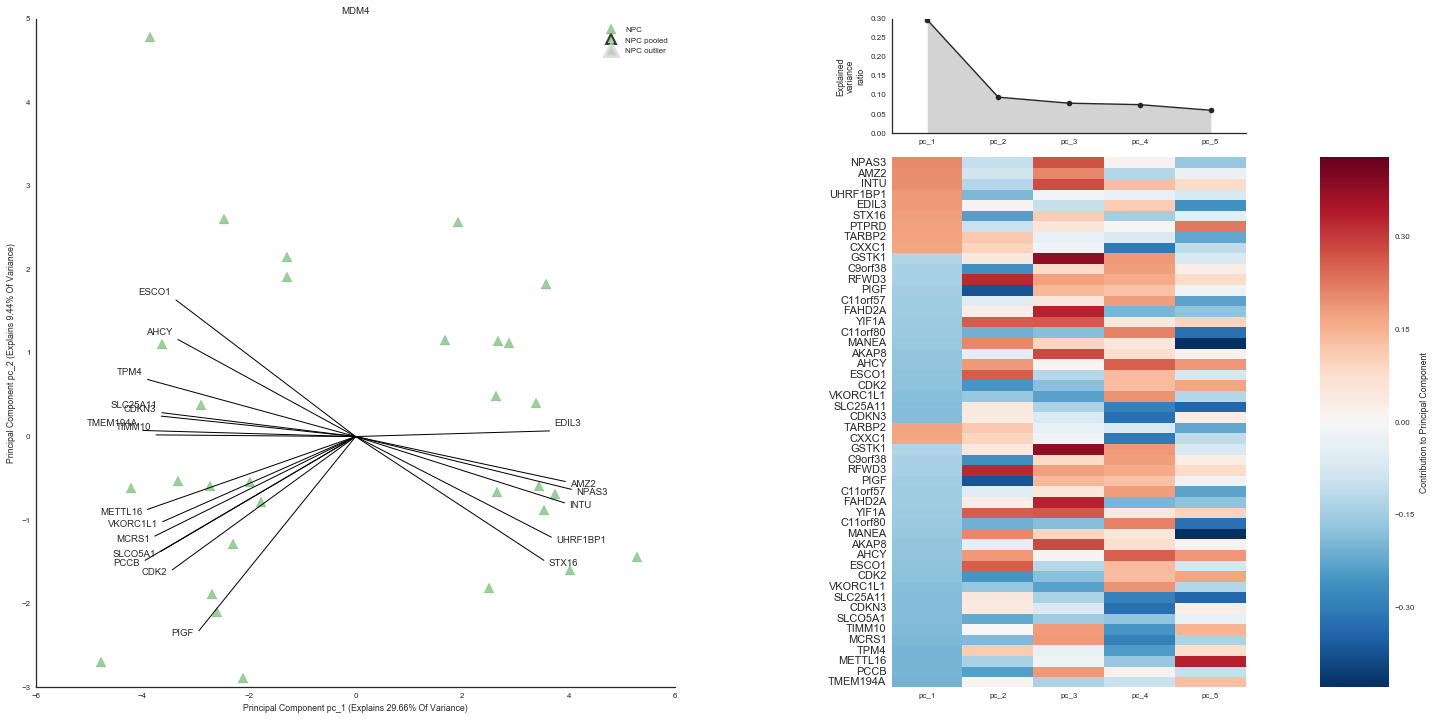

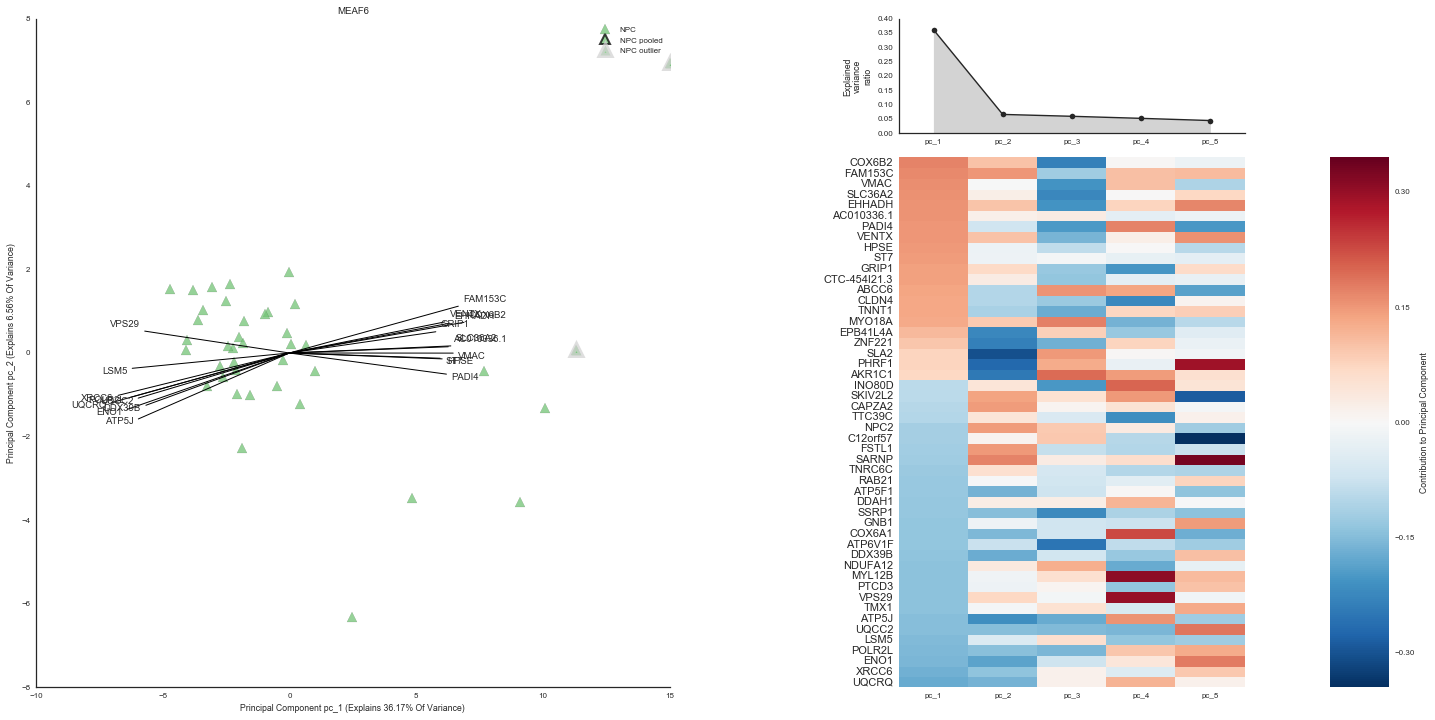

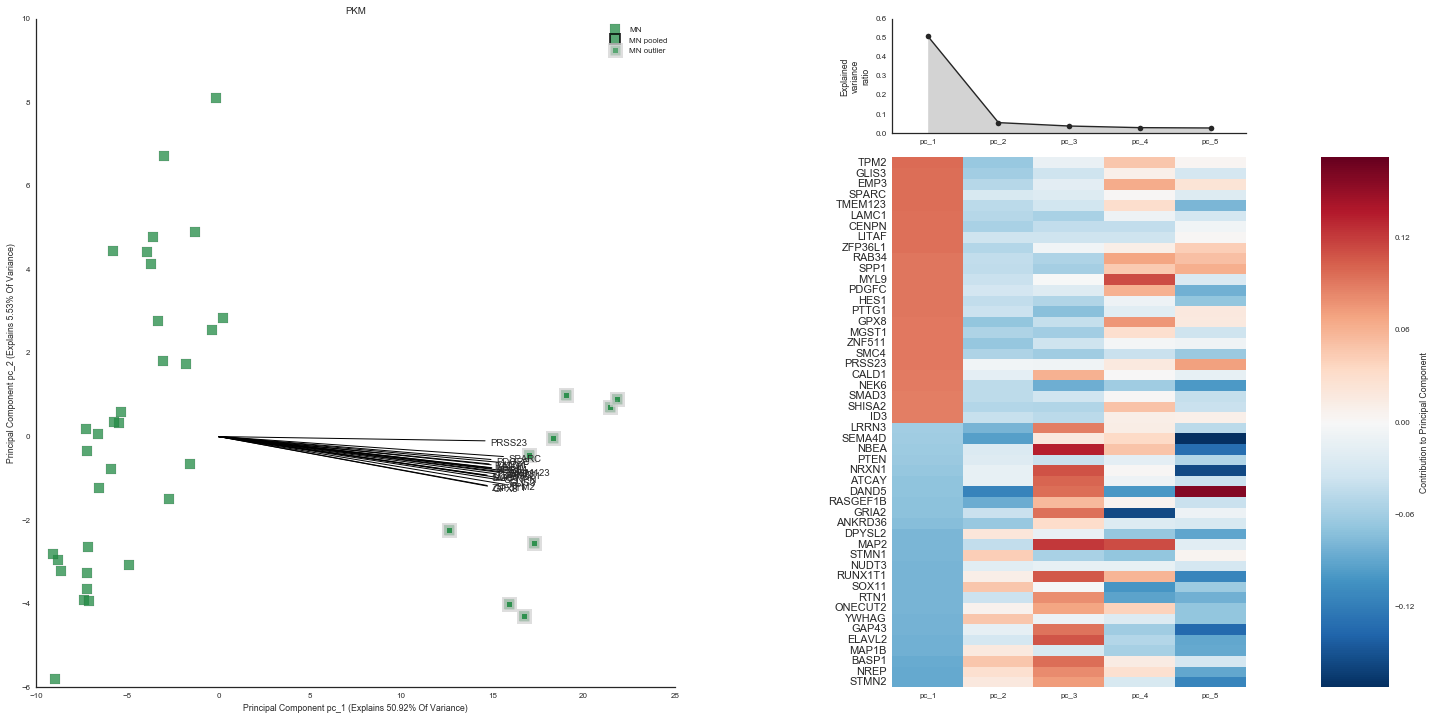

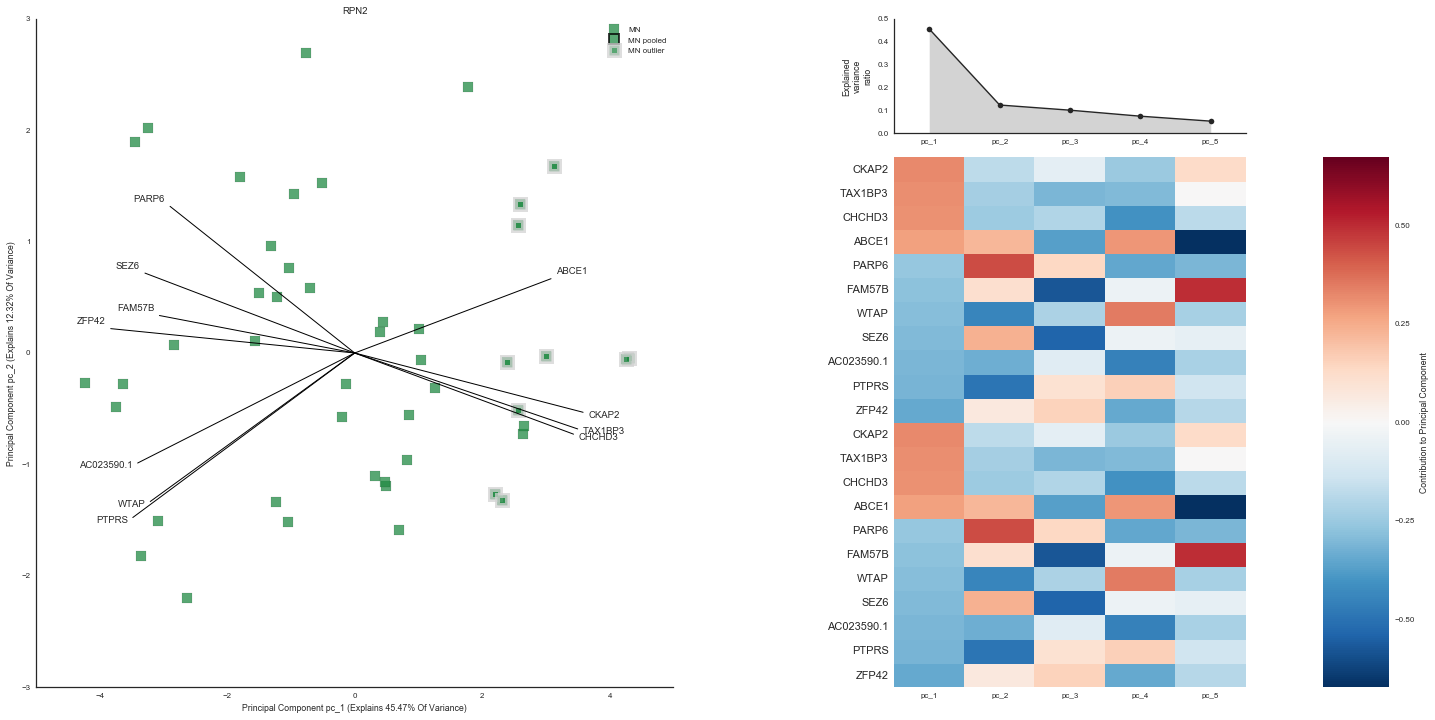

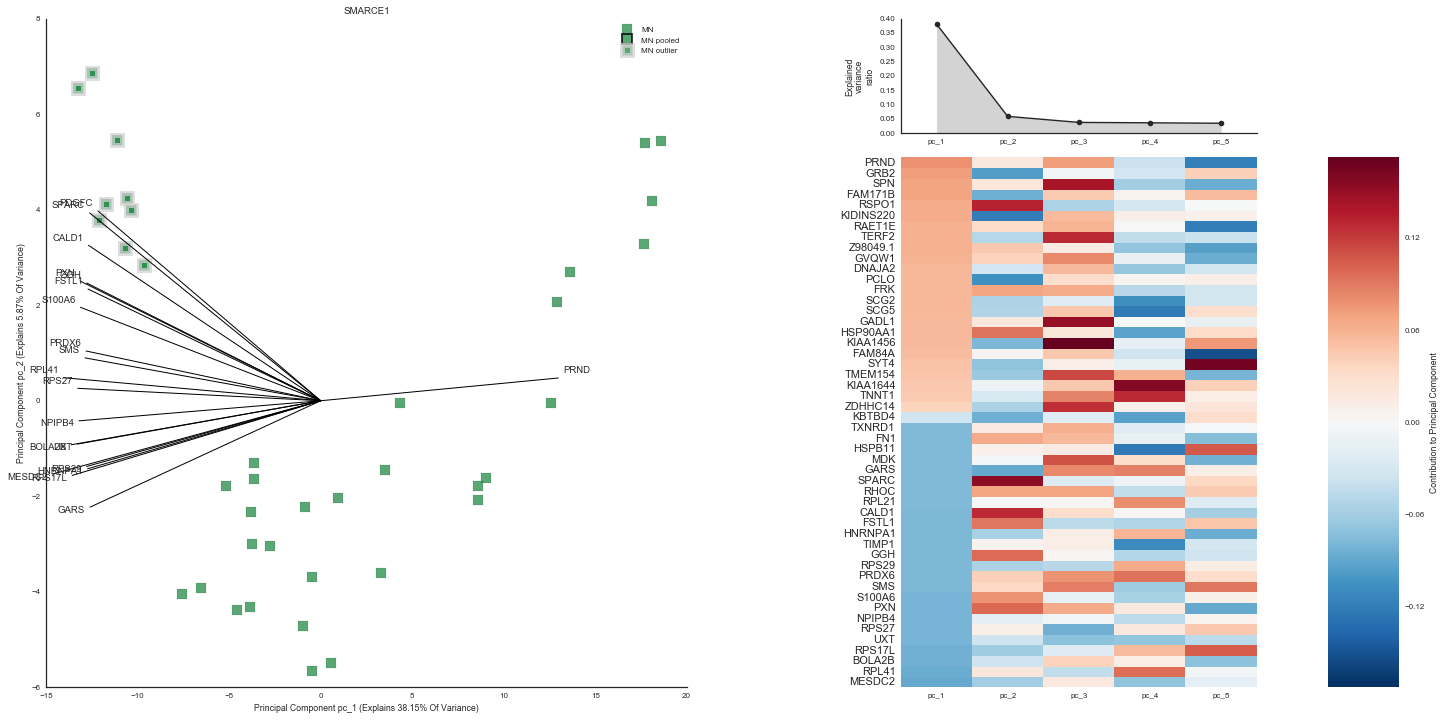

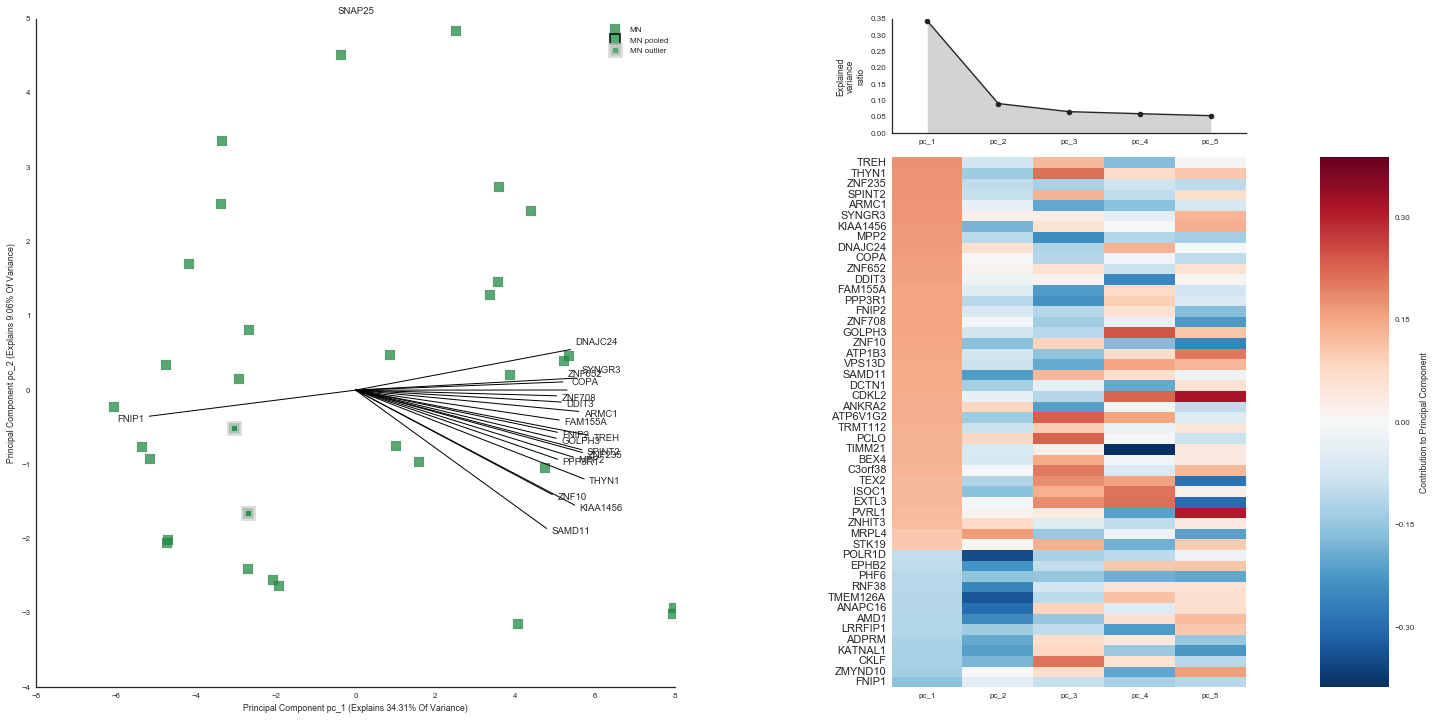

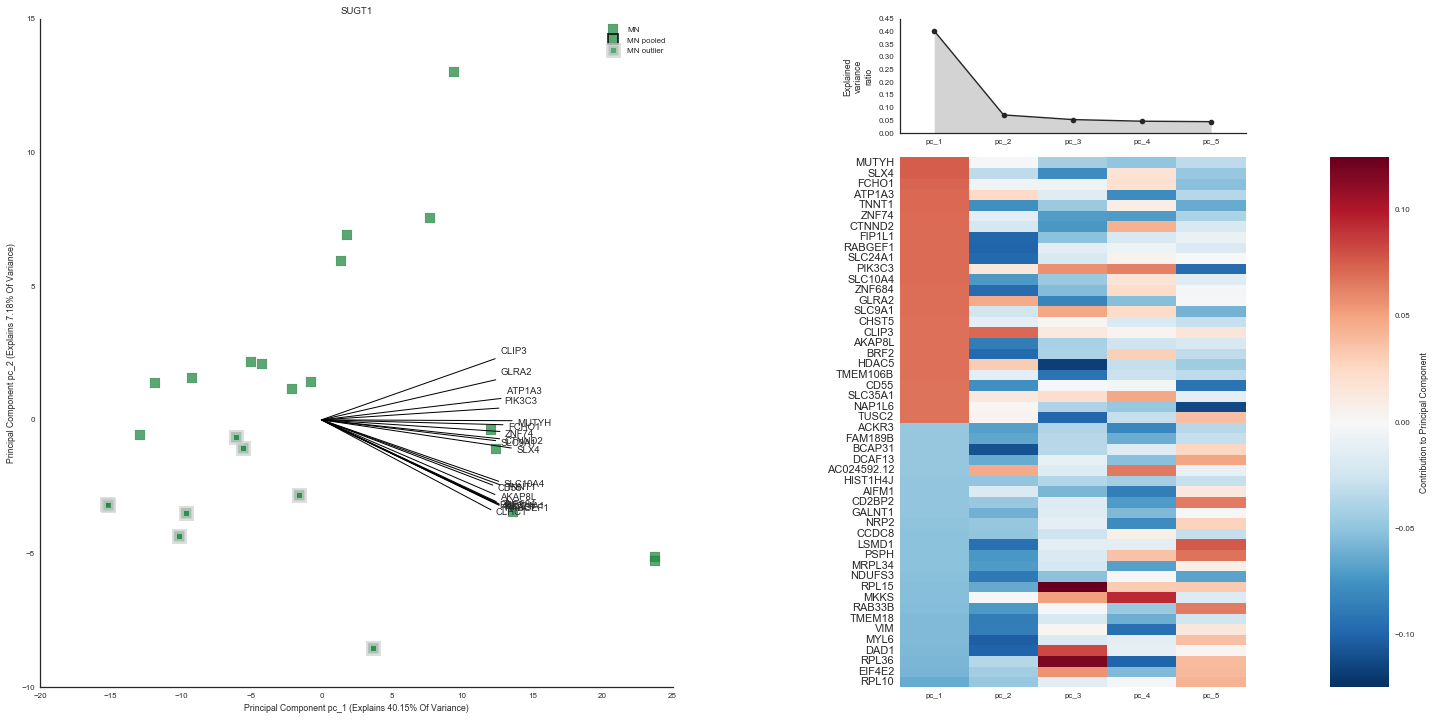

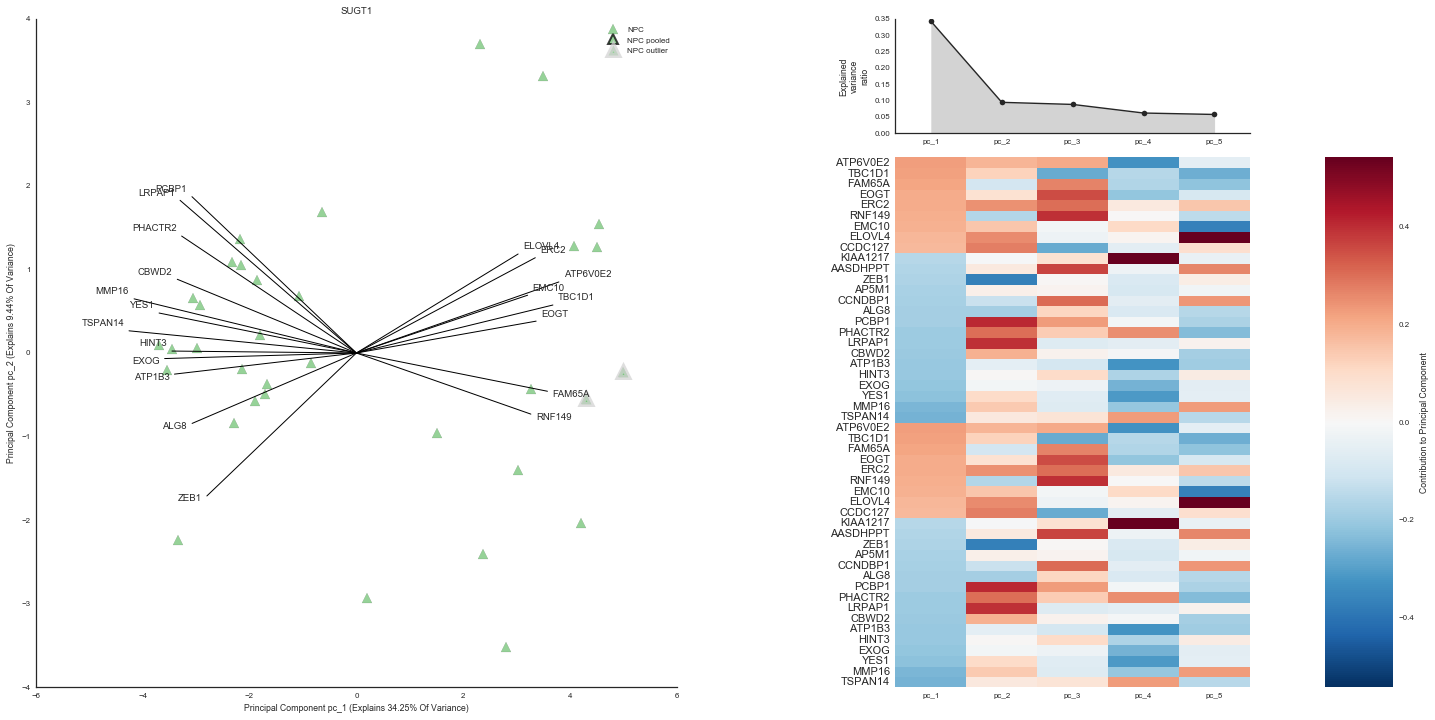

In [30]:
for (splicing_gene, phenotype), df in splicing_expression_corr_tidy_protein_coding.groupby(['Splicing Gene', 'phenotype']):
    splicing = splicing_to_correlate[splicing_gene].dropna()
    
    samples = single_metadata.query('phenotype == @phenotype').index
    samples = splicing.index.intersection(samples)
    splicing = splicing[samples]
    
    genes = df['Expression Gene']
    gene_names = df['gene_name']
    print(splicing_gene, '\t', phenotype, '\tsamples:', len(samples), '\tgenes:', len(genes))
    if len(genes) < 2:
        continue
        
    pcaviz = study.plot_pca(sample_subset=samples, feature_subset=genes)
    pcaviz.ax_components.set(title=splicing_gene)
    fig = plt.gcf()

    fig.savefig('{folder}/{splicing_gene}_{phenotype}_correlated_genes_pca.pdf'.format(
            folder=figure_folder, splicing_gene=splicing_gene, phenotype=phenotype))